# Flight Data Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

C:\Users\Atharv\AppData\Local\Temp\ipykernel_2280\760691403.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


## Read in and Format Data

In [2]:
df=pd.read_csv('Flight_Delay_Prediction.csv')
df

Unnamed: 0  FlightDate                                    Airline  \
0                  0  2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
1                  1  2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
2                  2  2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
3                  3  2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
4                  4  2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
...              ...         ...                                        ...   
29193777    29193777  2019-01-23                   ExpressJet Airlines Inc.   
29193778    29193778  2019-01-24                   ExpressJet Airlines Inc.   
29193779    29193779  2019-01-25                   ExpressJet Airlines Inc.   
29193780    29193780  2019-01-26                   ExpressJet Airlines Inc.   
29193781    29193781  2019-01-28                   ExpressJet Airlines Inc.   

          Flight_Number_Marketing_Airline Origin Dest  Cancelled  Diverted  \
0                                    4301    GJT  DEN      False     False   
1                                    4299    HRL  IAH      False     False   
2                                    4298    DRO  DEN      False     False   
3                                    4296    IAH  GPT      False     False   
4                                    4295    DRO  DEN      False     False   
...                                   ...    ...  ...        ...       ...   
29193777                             4252    MEM  IAH      False     False   
29193778                             4252    MEM  IAH      False     False   
29193779                             4252    MEM  IAH      False     False   
29193780                             4252    MEM  IAH      False     False   
29193781                             4252    MEM  IAH      False     False   

          CRSDepTime  DepTime  DepDelayMinutes  OriginAirportID  \
0               1133   1123.0              0.0            11921   
1                732    728.0              0.0            12206   
2               1529   1514.0              0.0            11413   
3               1435   1430.0              0.0            12266   
4               1135   1135.0              0.0            11413   
...              ...      ...              ...              ...   
29193777         640    634.0              0.0            13244   
29193778         640    631.0              0.0            13244   
29193779         640    632.0              0.0            13244   
29193780         640    630.0              0.0            13244   
29193781         640    632.0              0.0            13244   

                    OriginCityName OriginStateName  DestAirportID  \
0               Grand Junction, CO        Colorado          11292   
1         Harlingen/San Benito, TX           Texas          12266   
2                      Durango, CO        Colorado          11292   
3                      Houston, TX           Texas          11973   
4                      Durango, CO        Colorado          11292   
...                            ...             ...            ...   
29193777               Memphis, TN       Tennessee          12266   
29193778               Memphis, TN       Tennessee          12266   
29193779               Memphis, TN       Tennessee          12266   
29193780               Memphis, TN       Tennessee          12266   
29193781               Memphis, TN       Tennessee          12266   

                 DestCityName DestStateName  TaxiOut  TaxiIn  CRSArrTime  \
0                  Denver, CO      Colorado     17.0     8.0        1245   
1                 Houston, TX         Texas     16.0     9.0         849   
2                  Denver, CO      Colorado     21.0    14.0        1639   
3         Gulfport/Biloxi, MS   Mississippi     16.0     4.0        1605   
4                  Denver, CO      Colorado     19.0     8.0        1245   
...                       ...     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 22 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unnamed: 0                       int64  
 1   FlightDate                       object 
 2   Airline                          object 
 3   Flight_Number_Marketing_Airline  int64  
 4   Origin                           object 
 5   Dest                             object 
 6   Cancelled                        bool   
 7   Diverted                         bool   
 8   CRSDepTime                       int64  
 9   DepTime                          float64
 10  DepDelayMinutes                  float64
 11  OriginAirportID                  int64  
 12  OriginCityName                   object 
 13  OriginStateName                  object 
 14  DestAirportID                    int64  
 15  DestCityName                     object 
 16  DestStateName                    object 
 17  TaxiOu

In [4]:
cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    df[c] = df[c].astype("category")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 22 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   Unnamed: 0                       int64   
 1   FlightDate                       object  
 2   Airline                          category
 3   Flight_Number_Marketing_Airline  int64   
 4   Origin                           category
 5   Dest                             category
 6   Cancelled                        bool    
 7   Diverted                         bool    
 8   CRSDepTime                       int64   
 9   DepTime                          float64 
 10  DepDelayMinutes                  float64 
 11  OriginAirportID                  int64   
 12  OriginCityName                   object  
 13  OriginStateName                  category
 14  DestAirportID                    int64   
 15  DestCityName                     object  
 16  DestStateName                    c

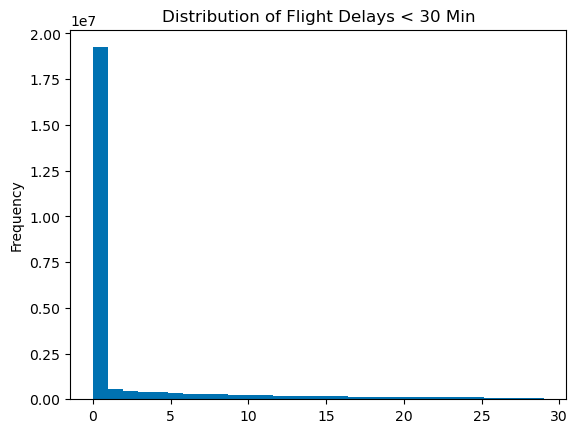

In [6]:
df.query("DepDelayMinutes < 30")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 30 Min"
)
plt.show()

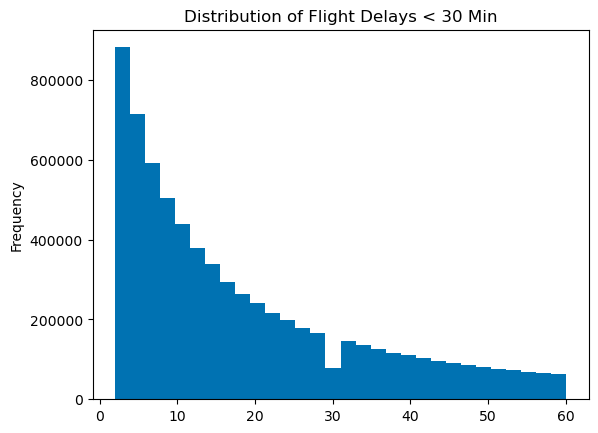

In [7]:
df.query("DepDelayMinutes > 1 and DepDelayMinutes < 61")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 30 Min"
)
plt.show()

In [8]:
df["DelayGroup"] = None
df.loc[df["DepDelayMinutes"] <= 1, "DelayGroup"] = "OnTime_Early"
df.loc[
    (df["DepDelayMinutes"] > 1) & (df["DepDelayMinutes"] <= 15), "DelayGroup"
] = "Small_Delay"
df.loc[
    (df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"
] = "Medium_Delay"
df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"

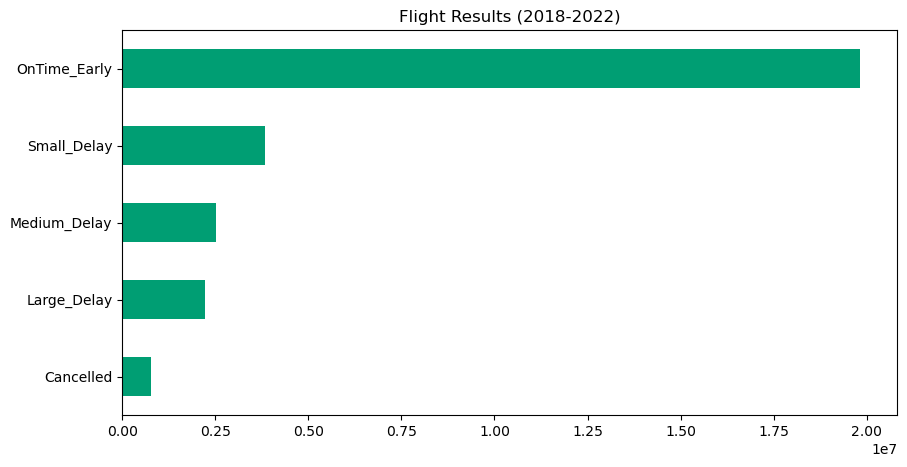

In [9]:
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), color=pal[1], title="Flight Results (2018-2022)"
)
plt.show()

## Flights Per Year

In [10]:
df['FlightDate']=pd.to_datetime(df['FlightDate'])

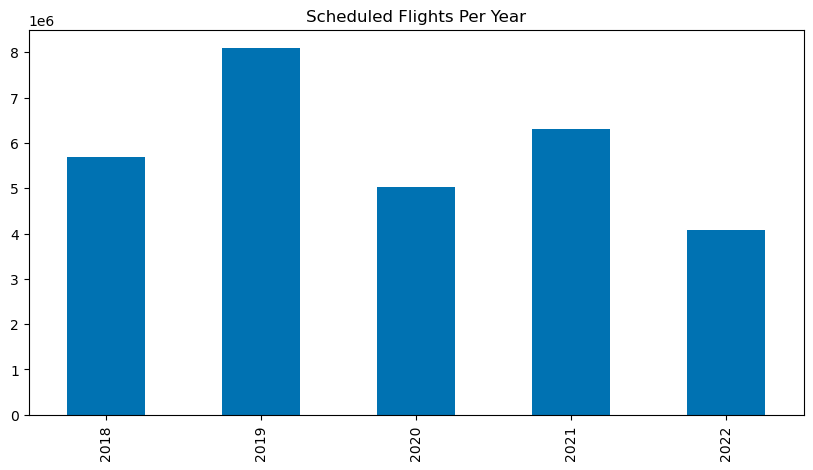

In [11]:
df["Year"] = df['FlightDate'].dt.year
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

## Results by Year

In [12]:
df["Year"] = df["FlightDate"].dt.year
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Greens")

## Results by Month

In [13]:
df["Month"] = df["FlightDate"].dt.month
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

## Exclude 2020

In [14]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("Year != 2020")
    .groupby("Month")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

- #### Now that the year 2020 has been removed, we see the high amount of cancellations in March/April that we saw in the previous vizz are no longer visible. Thus our hypothesis was correct.

## Why High Cancellation in March/April? What does it look like by year for these months?

In [15]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("3 <= Month <= 4")
    .groupby("Year")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Oranges", axis=0)

## Visualizing using CalPlot

Text(0.5, 0.92, 'US Flight Cancellations')

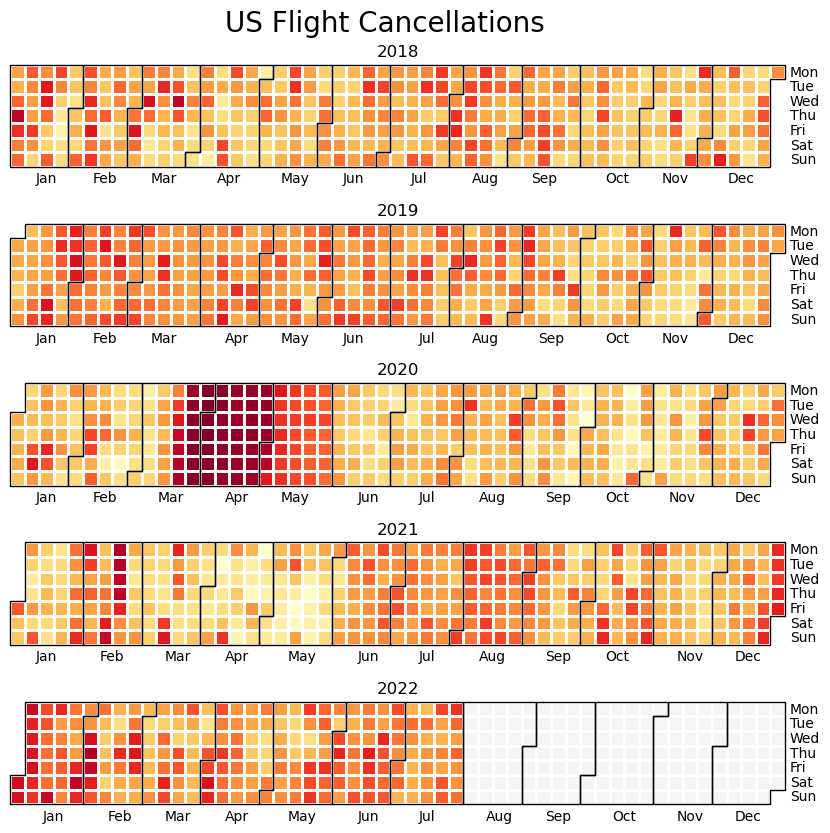

In [16]:
import calmap
events = df.groupby("FlightDate")["Cancelled"].mean()
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    calmap.yearplot(
        events.apply(np.log), year=year, cmap="YlOrRd", monthly_border=True, ax=axs[i]
    )
    axs[i].set_title(year)
fig.patch.set_facecolor("white")
fig.suptitle("US Flight Cancellations", y=0.92, fontsize=20)

## Compare Airlines
- Who has the most delays?
- Who has the most cancellations?
- Who is the most reliable? (on time)

Text(0.5, 0, 'Flights (100k)')

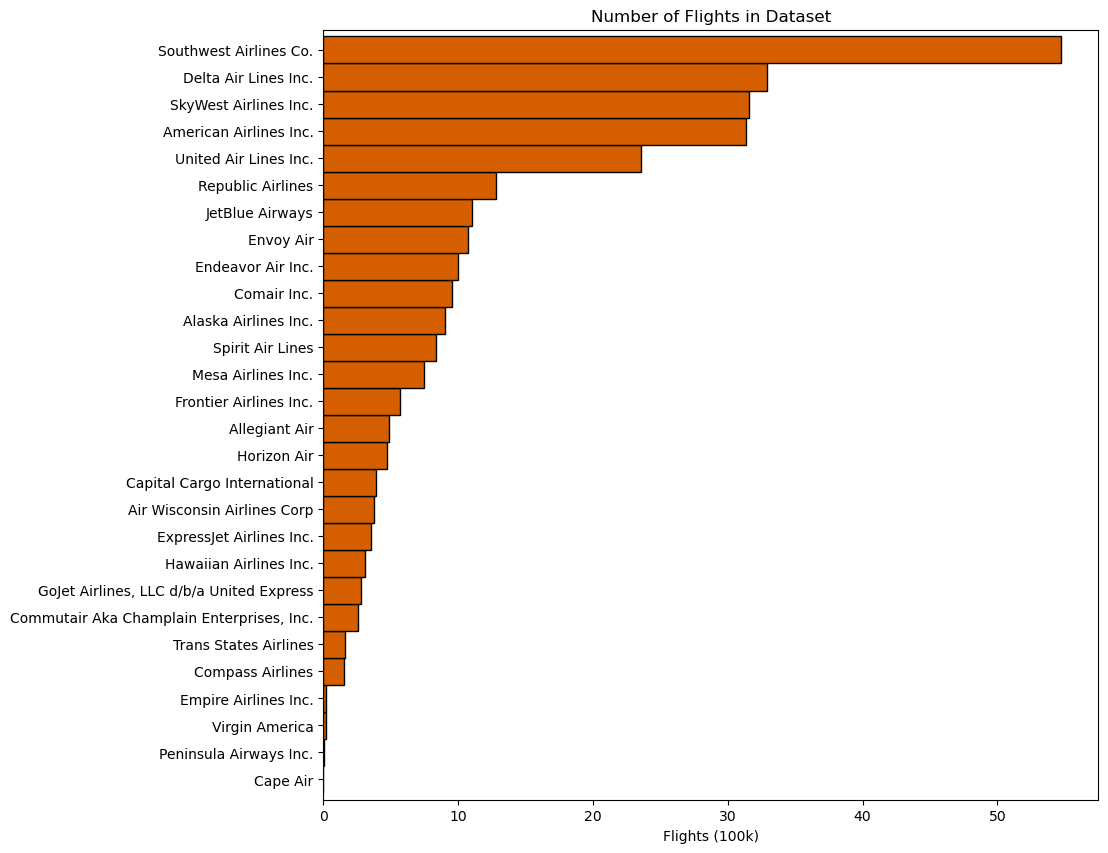

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
airlines_ordered = (df["Airline"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)
ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")

In [18]:
top_airlines = (
    df["Airline"]
    .value_counts()
    .reset_index()
    .query("Airline > 1_000_000")["index"]
    .values.tolist()
)

df_top = df.loc[df["Airline"].isin(top_airlines)].reset_index(drop=True).copy()

In [19]:
# Reset airline categories
df_top["Airline"] = df_top["Airline"].astype("str").astype("category")

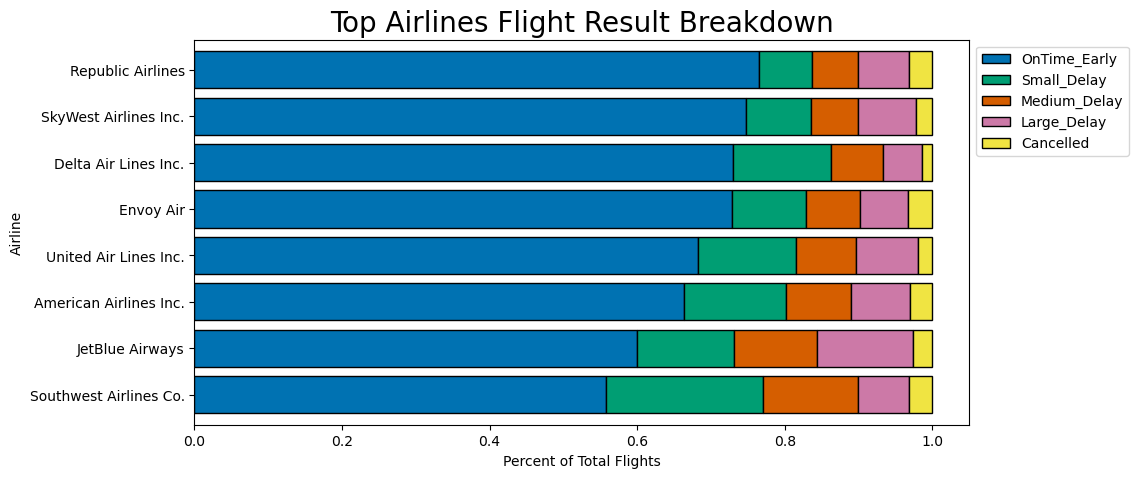

In [20]:
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_top.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [21]:
delay_mapping = {
    "OnTime_Early": "Good",
    "Small_Delay": "Good",
    "Medium_Delay": "Bad",
    "Large_Delay": "Bad",
    "Cancelled": "Bad",
}

In [22]:
df_top["DelayOk"] = df_top["DelayGroup"].map(delay_mapping)

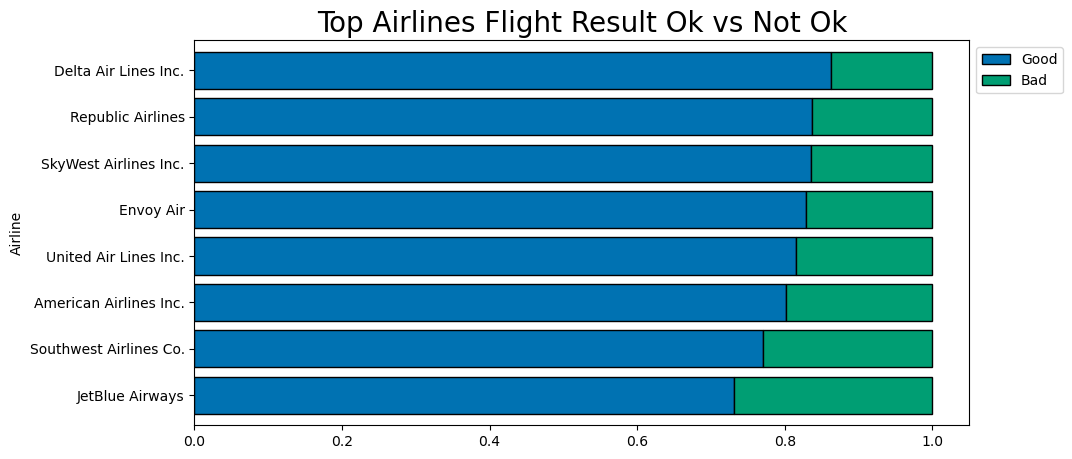

In [23]:
df_agg = (
    df_top.groupby(["Airline"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Ok vs Not Ok", fontsize=20)

plt.show()

- ##### Above visualization summarises our findings at a higher level of abstraction.

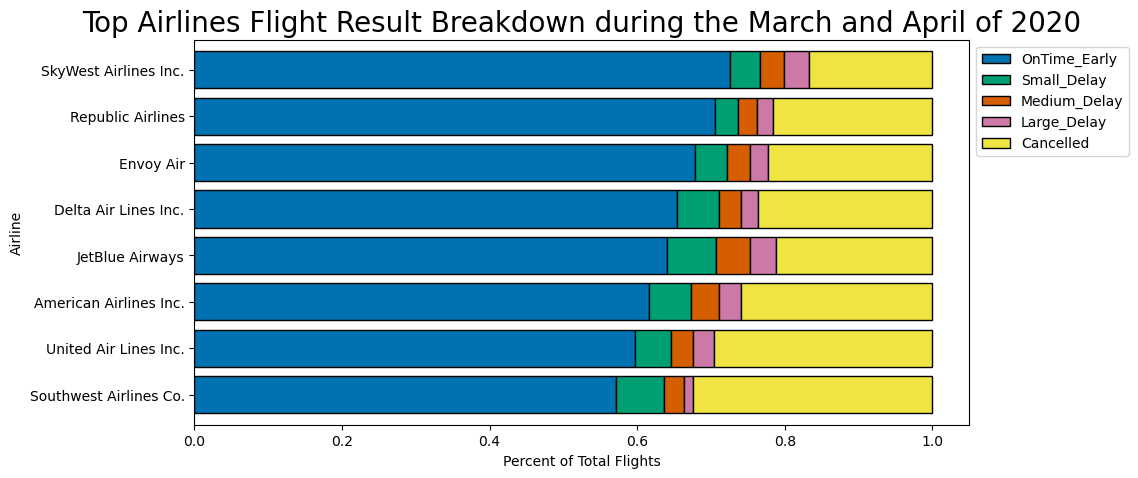

In [24]:
df_v=df_top[df_top['Year']==2020]
df_vizz=df_v.query("3 <= Month <= 4")

col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_vizz.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown during the March and April of 2020", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [25]:
city_counts = df['OriginCityName'].value_counts().reset_index()
city_counts.columns = ['OriginCityName', 'Count']

city_counts

OriginCityName    Count
0              Chicago, IL  1710564
1              Atlanta, GA  1371796
2               Denver, CO  1170585
3    Dallas/Fort Worth, TX  1104266
4             New York, NY   960095
..                     ...      ...
376             Bishop, CA      299
377           Cold Bay, AK      262
378         Wilmington, DE      165
379               Rota, TT      151
380  Youngstown/Warren, OH        2

[381 rows x 2 columns]

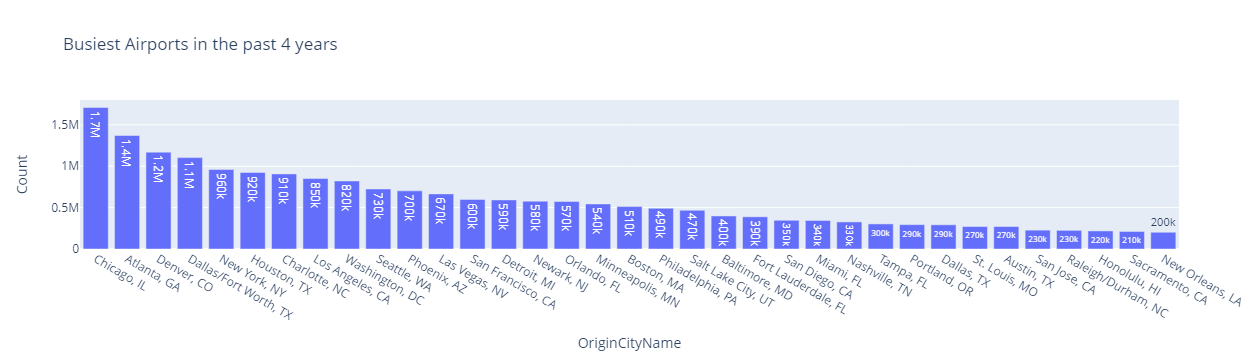

In [26]:
import plotly.express as px
city=city_counts[city_counts['Count']>200000]
px.bar(city,x='OriginCityName',y='Count',text_auto='.2s',title='Busiest Airports in the past 4 years')

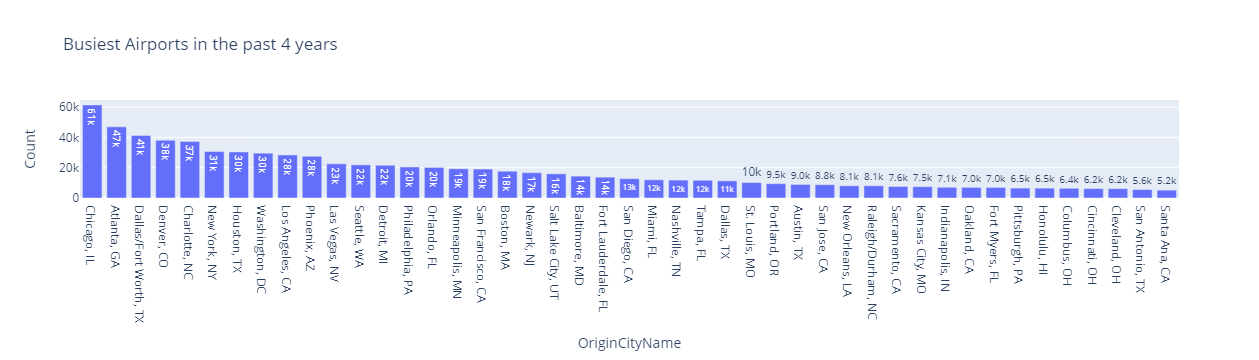

In [27]:
df_n=df.query("3 <= Month <= 4 and Year==2020")
city_counts = df_n['OriginCityName'].value_counts().reset_index()
city_counts.columns = ['OriginCityName', 'Count']
city=city_counts[city_counts['Count']>5000]
px.bar(city,x='OriginCityName',y='Count',text_auto='.2s',title='Busiest Airports in the past 4 years')

- ##### Here we can see that during the COVID months, Chicago, Atlanta and Dallas were some of the busiest airports.

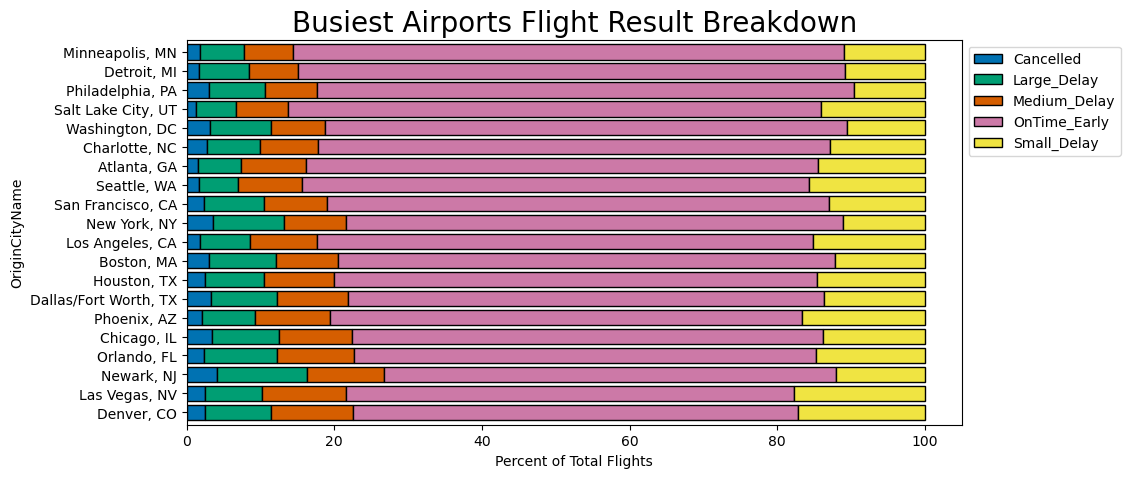

In [28]:
city_counts = df['OriginCityName'].value_counts().reset_index()
city_counts.columns = ['OriginCityName', 'Count']

df_new=pd.merge(df, city_counts, on='OriginCityName')

df_agg = (
    df_new.query("Count>=400000")
    .groupby("OriginCityName")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Busiest Airports Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

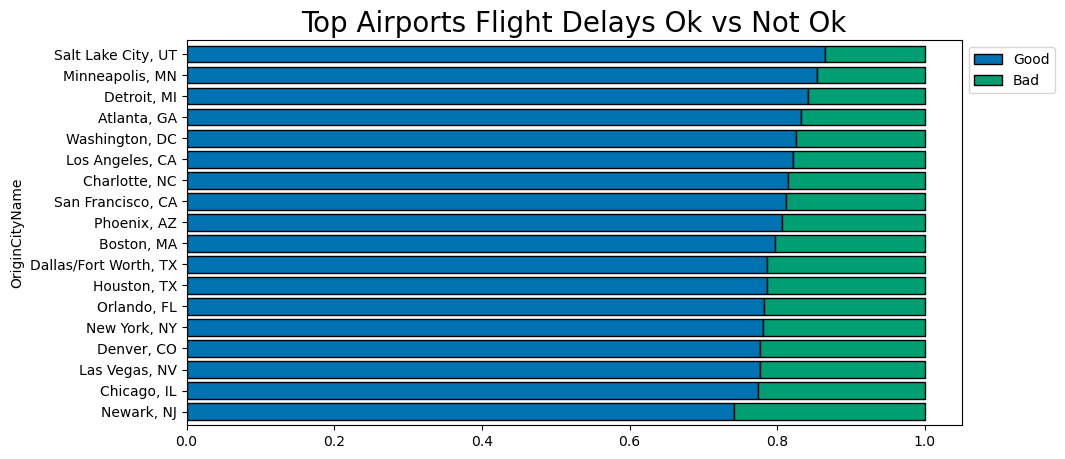

In [29]:
city_counts = df_top['OriginCityName'].value_counts().reset_index()
city_counts.columns = ['OriginCityName', 'Count']

df_new=pd.merge(df_top, city_counts, on='OriginCityName')


df_agg = (
    df_new.query("Count>=400000")
    .groupby(["OriginCityName"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airports Flight Delays Ok vs Not Ok", fontsize=20)

plt.show()

- ##### Above visualization summarises our findings at a higher level of abstraction.

In [30]:
city_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OriginCityName  331 non-null    object
 1   Count           331 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [31]:
df.head()

Unnamed: 0 FlightDate                                    Airline  \
0           0 2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
1           1 2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
2           2 2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
3           3 2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
4           4 2022-04-04  Commutair Aka Champlain Enterprises, Inc.   

   Flight_Number_Marketing_Airline Origin Dest  Cancelled  Diverted  \
0                             4301    GJT  DEN      False     False   
1                             4299    HRL  IAH      False     False   
2                             4298    DRO  DEN      False     False   
3                             4296    IAH  GPT      False     False   
4                             4295    DRO  DEN      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  OriginAirportID  \
0        1133   1123.0              0.0            11921   
1         732    728.0              0.0            12206   
2        1529   1514.0              0.0            11413   
3        1435   1430.0              0.0            12266   
4        1135   1135.0              0.0            11413   

             OriginCityName OriginStateName  DestAirportID  \
0        Grand Junction, CO        Colorado          11292   
1  Harlingen/San Benito, TX           Texas          12266   
2               Durango, CO        Colorado          11292   
3               Houston, TX           Texas          11973   
4               Durango, CO        Colorado          11292   

          DestCityName DestStateName  TaxiOut  TaxiIn  CRSArrTime  ArrTime  \
0           Denver, CO      Colorado     17.0     8.0        1245   1228.0   
1          Houston, TX         Texas     16.0     9.0         849    848.0   
2           Denver, CO      Colorado     21.0    14.0        1639   1636.0   
3  Gulfport/Biloxi, MS   Mississippi     16.0     4.0        1605   1547.0   
4           Denver, CO      Colorado     19.0     8.0        1245   1251.0   

   ArrDelayMinutes    DelayGroup  Year  Month  
0              0.0  OnTime_Early  2022      4  
1              0.0  OnTime_Early  2022      4  
2              0.0  OnTime_Early  2022      4  
3              0.0  OnTime_Early  2022      4  
4              6.0  OnTime_Early  2022      4

# Data Transformation for Machine Learning

In [32]:
df_top['OriginCityName'].nunique()

331

In [33]:
df_top['DestCityName'].nunique()

331

In [34]:
df["DelayOk"] = df["DelayGroup"].map(delay_mapping)

In [35]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df['Airline']=le1.fit_transform(df['Airline'])

In [36]:
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
df['Origin']=le2.fit_transform(df['Origin'])

In [37]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
df['Dest']=le2.fit_transform(df['Dest'])

In [38]:
from sklearn.preprocessing import LabelEncoder
le4=LabelEncoder()
df['Cancelled']=le4.fit_transform(df['Cancelled'])

In [39]:
from sklearn.preprocessing import LabelEncoder
le5=LabelEncoder()
df['Diverted']=le5.fit_transform(df['Diverted'])

In [40]:
from sklearn.preprocessing import LabelEncoder
le6=LabelEncoder()
df['OriginCityName']=le6.fit_transform(df['OriginCityName'])

In [41]:
from sklearn.preprocessing import LabelEncoder
le7=LabelEncoder()
df['DestCityName']=le7.fit_transform(df['DestCityName'])

In [42]:
from sklearn.preprocessing import LabelEncoder
le8=LabelEncoder()
df['OriginStateName']=le8.fit_transform(df['OriginStateName'])

In [43]:
from sklearn.preprocessing import LabelEncoder
le9=LabelEncoder()
df['DestStateName']=le9.fit_transform(df['DestStateName'])

In [44]:
from sklearn.preprocessing import LabelEncoder
le10=LabelEncoder()
df['DelayGroup']=le10.fit_transform(df['DelayGroup'])

In [45]:
from sklearn.preprocessing import LabelEncoder
le11=LabelEncoder()
df['DelayOk']=le11.fit_transform(df['DelayOk'])

In [46]:
df_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20880155 entries, 0 to 20880154
Data columns (total 26 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Unnamed: 0                       int64         
 1   FlightDate                       datetime64[ns]
 2   Airline                          category      
 3   Flight_Number_Marketing_Airline  int64         
 4   Origin                           category      
 5   Dest                             category      
 6   Cancelled                        bool          
 7   Diverted                         bool          
 8   CRSDepTime                       int64         
 9   DepTime                          float64       
 10  DepDelayMinutes                  float64       
 11  OriginAirportID                  int64         
 12  OriginCityName                   object        
 13  OriginStateName                  category      
 14  DestAirportID                   

In [47]:
df_top.isnull().sum()

Unnamed: 0                              0
FlightDate                              0
Airline                                 0
Flight_Number_Marketing_Airline         0
Origin                                  0
Dest                                    0
Cancelled                               0
Diverted                                0
CRSDepTime                              0
DepTime                            529726
DepDelayMinutes                    529784
OriginAirportID                         0
OriginCityName                          0
OriginStateName                         0
DestAirportID                           0
DestCityName                            0
DestStateName                           0
TaxiOut                            536922
TaxiIn                             545016
CRSArrTime                              0
ArrTime                            544993
ArrDelayMinutes                    588215
DelayGroup                              0
Year                              

In [48]:
df.dropna(inplace=True)

In [49]:
# df_new=df[df['Year']==2022]

In [50]:
df.head()

Unnamed: 0 FlightDate  Airline  Flight_Number_Marketing_Airline  Origin  \
0           0 2022-04-04        7                             4301     144   
1           1 2022-04-04        7                             4299     167   
2           2 2022-04-04        7                             4298     105   
3           3 2022-04-04        7                             4296     175   
4           4 2022-04-04        7                             4295     105   

   Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  \
0    99          0         0        1133   1123.0              0.0   
1   175          0         0         732    728.0              0.0   
2    99          0         0        1529   1514.0              0.0   
3   146          0         0        1435   1430.0              0.0   
4    99          0         0        1135   1135.0              0.0   

   OriginAirportID  OriginCityName  OriginStateName  DestAirportID  \
0            11921             129                5          11292   
1            12206             142               43          12266   
2            11413              99                5          11292   
3            12266             155               43          11973   
4            11413              99                5          11292   

   DestCityName  DestStateName  TaxiOut  TaxiIn  CRSArrTime  ArrTime  \
0            89              5     17.0     8.0        1245   1228.0   
1           155             43     16.0     9.0         849    848.0   
2            89              5     21.0    14.0        1639   1636.0   
3           137             23     16.0     4.0        1605   1547.0   
4            89              5     19.0     8.0        1245   1251.0   

   ArrDelayMinutes  DelayGroup  Year  Month  DelayOk  
0              0.0           3  2022      4        1  
1              0.0           3  2022      4        1  
2              0.0           3  2022      4        1  
3              0.0           3  2022      4        1  
4              6.0           3  2022      4        1

# Machine Learning Models Trained on the Entire Dataset

In [51]:
X=df.iloc[:,1:-1]
X.drop(['FlightDate','DelayGroup','DepTime','DepDelayMinutes','ArrTime','ArrDelayMinutes','TaxiIn','TaxiOut','Cancelled','Diverted'],axis=1,inplace=True)
y=df.iloc[:,-1:]

In [52]:
df_top

Unnamed: 0 FlightDate                 Airline  \
0               1821 2022-04-01  Southwest Airlines Co.   
1               1822 2022-04-01  Southwest Airlines Co.   
2               1823 2022-04-01  Southwest Airlines Co.   
3               1824 2022-04-01  Southwest Airlines Co.   
4               1825 2022-04-01  Southwest Airlines Co.   
...              ...        ...                     ...   
20880150    29162431 2019-01-28   SkyWest Airlines Inc.   
20880151    29162432 2019-01-28   SkyWest Airlines Inc.   
20880152    29162433 2019-01-28   SkyWest Airlines Inc.   
20880153    29162434 2019-01-29   SkyWest Airlines Inc.   
20880154    29162435 2019-01-29   SkyWest Airlines Inc.   

          Flight_Number_Marketing_Airline Origin Dest  Cancelled  Diverted  \
0                                     236    ABQ  AUS      False     False   
1                                    1238    ABQ  BUR      False     False   
2                                     100    ABQ  DAL      False     False   
3                                     869    ABQ  DAL      False     False   
4                                    1256    ABQ  DAL      False     False   
...                                   ...    ...  ...        ...       ...   
20880150                             5700    SMF  SLC      False     False   
20880151                             5739    SLC  MSO      False     False   
20880152                             5739    MSO  SLC      False     False   
20880153                             5744    SLC  MKE      False     False   
20880154                             5744    MKE  SLC      False     False   

          CRSDepTime  DepTime  DepDelayMinutes  OriginAirportID  \
0               1035   1037.0              2.0            10140   
1               1750   1823.0             33.0            10140   
2                645    648.0              3.0            10140   
3               1150   1146.0              0.0            10140   
4               1730   1757.0             27.0            10140   
...              ...      ...              ...              ...   
20880150        1030   1026.0              0.0            14893   
20880151        1537   1535.0              0.0            14869   
20880152        1756   1752.0              0.0            13486   
20880153        1355   1353.0              0.0            14869   
20880154        1834   1837.0              3.0            13342   

              OriginCityName OriginStateName  DestAirportID  \
0            Albuquerque, NM      New Mexico          10423   
1            Albuquerque, NM      New Mexico          10800   
2            Albuquerque, NM      New Mexico          11259   
3            Albuquerque, NM      New Mexico          11259   
4            Albuquerque, NM      New Mexico          11259   
...                      ...             ...            ...   
20880150      Sacramento, CA      California          14869   
20880151  Salt Lake City, UT            Utah          13486   
20880152        Missoula, MT         Montana          14869   
20880153  Salt Lake City, UT            Utah          13342   
20880154       Milwaukee, WI       Wisconsin          14869   

                DestCityName DestStateName  TaxiOut  TaxiIn  CRSArrTime  \
0                 Austin, TX         Texas      8.0     3.0        1315   
1                Burbank, CA    California     13.0     2.0        1850   
2                 Dallas, TX         Texas     13.0     2.0         930   
3                 Dallas, TX         Texas      9.0    28.0        1435   
4                 Dallas, TX         Texas     13.0     9.0        2010   
...                      ...           ...      ...     ...         ...   
20880150  Salt Lake City, UT          Utah     12.0     5.0        1313   
20880151        Missoula, MT       Montana     12.0     4.0        1726   
20880152  Salt Lake City, UT          Utah     11.0     5.0        1934   
20880153       Milwaukee, WI     Wisconsin     10.0 

In [53]:
X

Airline  Flight_Number_Marketing_Airline  Origin  Dest  CRSDepTime  \
0               7                             4301     144    99        1133   
1               7                             4299     167   175         732   
2               7                             4298     105    99        1529   
3               7                             4296     175   146        1435   
4               7                             4295     105    99        1135   
...           ...                              ...     ...   ...         ...   
29193777       13                             4252     231   175         640   
29193778       13                             4252     231   175         640   
29193779       13                             4252     231   175         640   
29193780       13                             4252     231   175         640   
29193781       13                             4252     231   175         640   

          OriginAirportID  OriginCityName  OriginStateName  DestAirportID  \
0                   11921             129                5          11292   
1                   12206             142               43          12266   
2                   11413              99                5          11292   
3                   12266             155               43          11973   
4                   11413              99                5          11292   
...                   ...             ...              ...            ...   
29193777            13244             218               42          12266   
29193778            13244             218               42          12266   
29193779            13244             218               42          12266   
29193780            13244             218               42          12266   
29193781            13244             218               42          12266   

          DestCityName  DestStateName  CRSArrTime  Year  Month  
0                   89              5        1245  2022      4  
1                  155             43         849  2022      4  
2                   89              5        1639  2022      4  
3                  137             23        1605  2022      4  
4                   89              5        1245  2022      4  
...                ...            ...         ...   ...    ...  
29193777           155             43         840  2019      1  
29193778           155             43         840  2019      1  
29193779           155             43         840  2019      1  
29193780           155             43         840  2019      1  
29193781           155             43         840  2019      1  

[28339598 rows x 14 columns]

In [54]:
y

DelayOk
0               1
1               1
2               1
3               1
4               1
...           ...
29193777        1
29193778        1
29193779        1
29193780        1
29193781        1

[28339598 rows x 1 columns]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

## XGBoost

In [71]:
# from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.04      0.08    944030
           1       0.84      0.99      0.91   4723890

    accuracy                           0.84   5667920
   macro avg       0.71      0.52      0.50   5667920
weighted avg       0.80      0.84      0.77   5667920



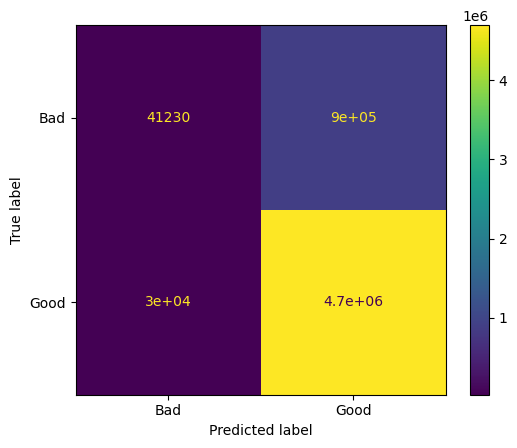

In [73]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [74]:
y_pred2=classifier2.predict(X_train)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.58      0.04      0.08   3773724
           1       0.84      0.99      0.91  18897954

    accuracy                           0.84  22671678
   macro avg       0.71      0.52      0.50  22671678
weighted avg       0.80      0.84      0.77  22671678



## LightGBM

In [76]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\Atharv\anaconda_new\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Atharv\anaconda_new\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.03      0.06    944030
           1       0.84      1.00      0.91   4723890

    accuracy                           0.84   5667920
   macro avg       0.72      0.51      0.48   5667920
weighted avg       0.80      0.84      0.77   5667920



In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8351428742819236

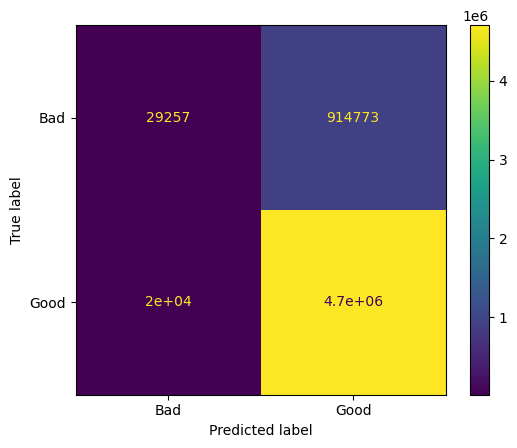

In [79]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [80]:
y_pred2=clf.predict(X_train)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.60      0.03      0.06   3773724
           1       0.84      1.00      0.91  18897954

    accuracy                           0.84  22671678
   macro avg       0.72      0.51      0.48  22671678
weighted avg       0.80      0.84      0.77  22671678



## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(max_depth=20)
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.10      0.16    944030
           1       0.84      0.98      0.91   4723890

    accuracy                           0.83   5667920
   macro avg       0.67      0.54      0.53   5667920
weighted avg       0.79      0.83      0.78   5667920



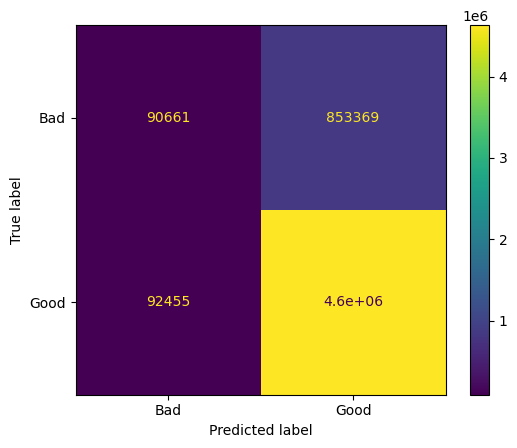

In [59]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [60]:
y_pred2=classifier2.predict(X_train)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.63      0.12      0.20   3773724
           1       0.85      0.99      0.91  18897954

    accuracy                           0.84  22671678
   macro avg       0.74      0.55      0.56  22671678
weighted avg       0.81      0.84      0.79  22671678



### This is the Model Performance on the entire dataset but during the EDA phase we noticed that 2020 had the most number of delays and cancellations all due to the COVID-19 pandemic so using it for training a flight delay prediction model may not result in Accurate predictions.

# Machine Learning Models trained on data excluding the year 2020

In [51]:
new_df=df[df['Year']!=2020]

In [52]:
len(new_df)

23626668

In [53]:
X=new_df.iloc[:,1:-1]
X.drop(['FlightDate','DelayGroup','DepTime','DepDelayMinutes','ArrTime','ArrDelayMinutes','TaxiIn','TaxiOut','Cancelled','Diverted'],axis=1,inplace=True)
y=new_df.iloc[:,-1:]

In [68]:
df_top

Unnamed: 0 FlightDate                 Airline  \
0               1821 2022-04-01  Southwest Airlines Co.   
1               1822 2022-04-01  Southwest Airlines Co.   
2               1823 2022-04-01  Southwest Airlines Co.   
3               1824 2022-04-01  Southwest Airlines Co.   
4               1825 2022-04-01  Southwest Airlines Co.   
...              ...        ...                     ...   
20880150    29162431 2019-01-28   SkyWest Airlines Inc.   
20880151    29162432 2019-01-28   SkyWest Airlines Inc.   
20880152    29162433 2019-01-28   SkyWest Airlines Inc.   
20880153    29162434 2019-01-29   SkyWest Airlines Inc.   
20880154    29162435 2019-01-29   SkyWest Airlines Inc.   

          Flight_Number_Marketing_Airline Origin Dest  Cancelled  Diverted  \
0                                     236    ABQ  AUS      False     False   
1                                    1238    ABQ  BUR      False     False   
2                                     100    ABQ  DAL      False     False   
3                                     869    ABQ  DAL      False     False   
4                                    1256    ABQ  DAL      False     False   
...                                   ...    ...  ...        ...       ...   
20880150                             5700    SMF  SLC      False     False   
20880151                             5739    SLC  MSO      False     False   
20880152                             5739    MSO  SLC      False     False   
20880153                             5744    SLC  MKE      False     False   
20880154                             5744    MKE  SLC      False     False   

          CRSDepTime  DepTime  DepDelayMinutes  OriginAirportID  \
0               1035   1037.0              2.0            10140   
1               1750   1823.0             33.0            10140   
2                645    648.0              3.0            10140   
3               1150   1146.0              0.0            10140   
4               1730   1757.0             27.0            10140   
...              ...      ...              ...              ...   
20880150        1030   1026.0              0.0            14893   
20880151        1537   1535.0              0.0            14869   
20880152        1756   1752.0              0.0            13486   
20880153        1355   1353.0              0.0            14869   
20880154        1834   1837.0              3.0            13342   

              OriginCityName OriginStateName  DestAirportID  \
0            Albuquerque, NM      New Mexico          10423   
1            Albuquerque, NM      New Mexico          10800   
2            Albuquerque, NM      New Mexico          11259   
3            Albuquerque, NM      New Mexico          11259   
4            Albuquerque, NM      New Mexico          11259   
...                      ...             ...            ...   
20880150      Sacramento, CA      California          14869   
20880151  Salt Lake City, UT            Utah          13486   
20880152        Missoula, MT         Montana          14869   
20880153  Salt Lake City, UT            Utah          13342   
20880154       Milwaukee, WI       Wisconsin          14869   

                DestCityName DestStateName  TaxiOut  TaxiIn  CRSArrTime  \
0                 Austin, TX         Texas      8.0     3.0        1315   
1                Burbank, CA    California     13.0     2.0        1850   
2                 Dallas, TX         Texas     13.0     2.0         930   
3                 Dallas, TX         Texas      9.0    28.0        1435   
4                 Dallas, TX         Texas     13.0     9.0        2010   
...                      ...           ...      ...     ...         ...   
20880150  Salt Lake City, UT          Utah     12.0     5.0        1313   
20880151        Missoula, MT       Montana     12.0     4.0        1726   
20880152  Salt Lake City, UT          Utah     11.0     5.0        1934   
20880153       Milwaukee, WI     Wisconsin     10.0 

In [69]:
X

Airline  Flight_Number_Marketing_Airline  Origin  Dest  CRSDepTime  \
0               7                             4301     144    99        1133   
1               7                             4299     167   175         732   
2               7                             4298     105    99        1529   
3               7                             4296     175   146        1435   
4               7                             4295     105    99        1135   
...           ...                              ...     ...   ...         ...   
29193777       13                             4252     231   175         640   
29193778       13                             4252     231   175         640   
29193779       13                             4252     231   175         640   
29193780       13                             4252     231   175         640   
29193781       13                             4252     231   175         640   

          OriginAirportID  OriginCityName  OriginStateName  DestAirportID  \
0                   11921             129                5          11292   
1                   12206             142               43          12266   
2                   11413              99                5          11292   
3                   12266             155               43          11973   
4                   11413              99                5          11292   
...                   ...             ...              ...            ...   
29193777            13244             218               42          12266   
29193778            13244             218               42          12266   
29193779            13244             218               42          12266   
29193780            13244             218               42          12266   
29193781            13244             218               42          12266   

          DestCityName  DestStateName  CRSArrTime  Year  Month  
0                   89              5        1245  2022      4  
1                  155             43         849  2022      4  
2                   89              5        1639  2022      4  
3                  137             23        1605  2022      4  
4                   89              5        1245  2022      4  
...                ...            ...         ...   ...    ...  
29193777           155             43         840  2019      1  
29193778           155             43         840  2019      1  
29193779           155             43         840  2019      1  
29193780           155             43         840  2019      1  
29193781           155             43         840  2019      1  

[23626668 rows x 14 columns]

In [70]:
y

DelayOk
0               1
1               1
2               1
3               1
4               1
...           ...
29193777        1
29193778        1
29193779        1
29193780        1
29193781        1

[23626668 rows x 1 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

## XGBoost

In [72]:
# from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.05      0.09    861295
           1       0.82      0.99      0.90   3864039

    accuracy                           0.82   4725334
   macro avg       0.71      0.52      0.49   4725334
weighted avg       0.78      0.82      0.75   4725334



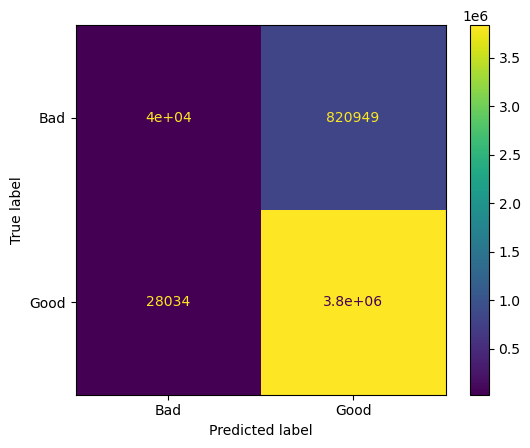

In [74]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [75]:
y_pred2=classifier2.predict(X_train)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.05      0.09   3441293
           1       0.82      0.99      0.90  15460041

    accuracy                           0.82  18901334
   macro avg       0.71      0.52      0.49  18901334
weighted avg       0.78      0.82      0.75  18901334



## LightGBM

In [77]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\Atharv\anaconda_new\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Atharv\anaconda_new\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.04      0.07    861295
           1       0.82      0.99      0.90   3864039

    accuracy                           0.82   4725334
   macro avg       0.71      0.52      0.48   4725334
weighted avg       0.78      0.82      0.75   4725334



In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.819856543473964

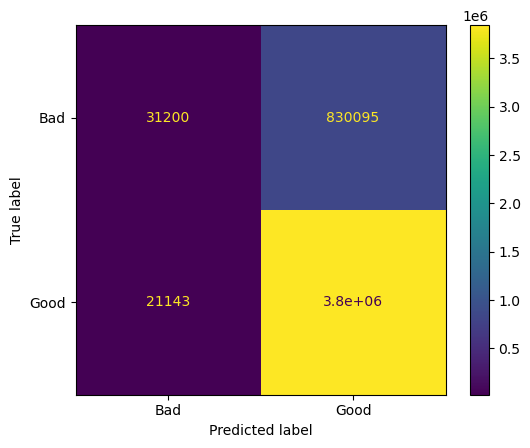

In [80]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [81]:
y_pred2=clf.predict(X_train)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.60      0.04      0.07   3441293
           1       0.82      0.99      0.90  15460041

    accuracy                           0.82  18901334
   macro avg       0.71      0.52      0.48  18901334
weighted avg       0.78      0.82      0.75  18901334



## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(max_depth=20)
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.11      0.18    861295
           1       0.83      0.98      0.90   3864039

    accuracy                           0.82   4725334
   macro avg       0.67      0.54      0.54   4725334
weighted avg       0.77      0.82      0.77   4725334



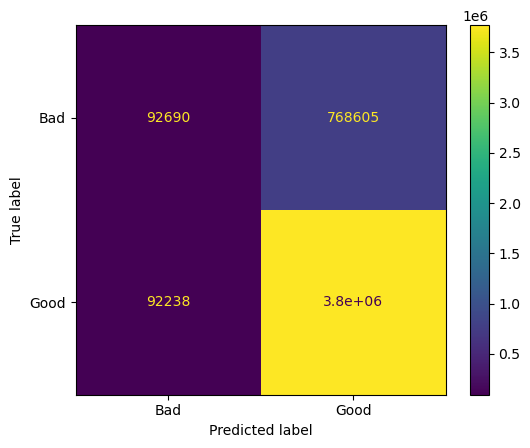

In [85]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [86]:
y_pred2=classifier2.predict(X_train)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.63      0.13      0.22   3441293
           1       0.84      0.98      0.90  15460041

    accuracy                           0.83  18901334
   macro avg       0.73      0.56      0.56  18901334
weighted avg       0.80      0.83      0.78  18901334



# Conclusion

### The accuracy of the models trained on the entire dataset may be marginally higher but we need to look deeper to really understand why models trained on the dataset excluding 2020 are actually far better.
### To begin with, take a look at the False Negatives and False Positives of XGBoost using the entire dataset vs using the dataset without the year 2020.
### Ideally we can have a higher number of False Negatives as if the model suggests that there would be a flight delay and in reality there isn't, the person won't miss the connecting flight.
### We need as low as possible number of False Positives as if the model says the flight will not be delayed but if in reality it gets delayed, the person may miss the connecting Flight.
### We hence see that the XGBoost model trained on the dataset without the year 2020, seems to have the best balance of False Negatives and False positives while still maintaining a decent accuracy of 82%. So we choose this model as our final model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier = xgboost.XGBClassifier()
params = {
 "learning_rate" : [0.05,0.10,0.20,0.30],
 "max_depth" : [ 3, 5, 8, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}
rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train,y_train)

print("Tuned Decision Tree Parameters: {}".format(rs_model.best_params_))
print("Best score is {}".format(rs_model.best_score_))